In [1]:
import pandas as pd
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [4]:
data_path = "/home/jenno/data/data/MSCOCO2017"
csv_path = os.path.join(data_path, "val_object.csv")

In [5]:
df = pd.read_csv(csv_path)
data = df.to_dict('list')
print(data.keys())

dict_keys(['image', 'num_obj', 'x1', 'y1', 'x2', 'y2', 'obj_label', 'obj_mask'])


In [36]:
def show_data(data, idx, obj_idx=None):
    has_object = "num_obj" in data
    has_caption = "caption" in data
    #first let's get the image
    idx_data = {}
    for key in data:
        idx_data[key] = data[key][idx]
    image = cv2.imread(os.path.join(data_path, idx_data["image"]))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    fig, ax = plt.subplots(figsize=(20, 15))
    ax.imshow(image)
    if has_object:
        num_object = idx_data["num_obj"]
        print("image has {} objects".format(num_object))
        x1 = eval(idx_data["x1"])
        y1 = eval(idx_data["y1"])
        x2 = eval(idx_data["x2"])
        y2 = eval(idx_data["y2"])
        mask_path = os.path.join(data_path, idx_data["obj_mask"])
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        if obj_idx is not None:
            _x1 = x1[obj_idx]
            _y1 = y1[obj_idx]
            _x2 = x2[obj_idx]
            _y2 = y2[obj_idx]
            mask = np.where(mask == obj_idx+1, 255, 0)
            _x1 = int(np.round(_x1))
            _y1 = int(np.round(_y1))
            _x2 = int(np.round(_x2))
            _y2 = int(np.round(_y2))
            plt.gca().add_patch(Rectangle((_x1,_y1),width=_x2-_x1, height=_y2-_y1, fill=False,color="r"))
        else:
            for _x1, _y1, _x2, _y2 in zip(x1, y1, x2, y2):
                _x1 = int(np.round(_x1))
                _y1 = int(np.round(_y1))
                _x2 = int(np.round(_x2))
                _y2 = int(np.round(_y2))
                plt.gca().add_patch(Rectangle((_x1,_y1),width=_x2-_x1, height=_y2-_y1, fill=False,color="r"))
        plt.imshow(mask)
    # print caption
    if has_caption:
        captions = eval(idx_data["caption"])
        for caption in captions:
            print(caption)
    return mask

image has 20 objects


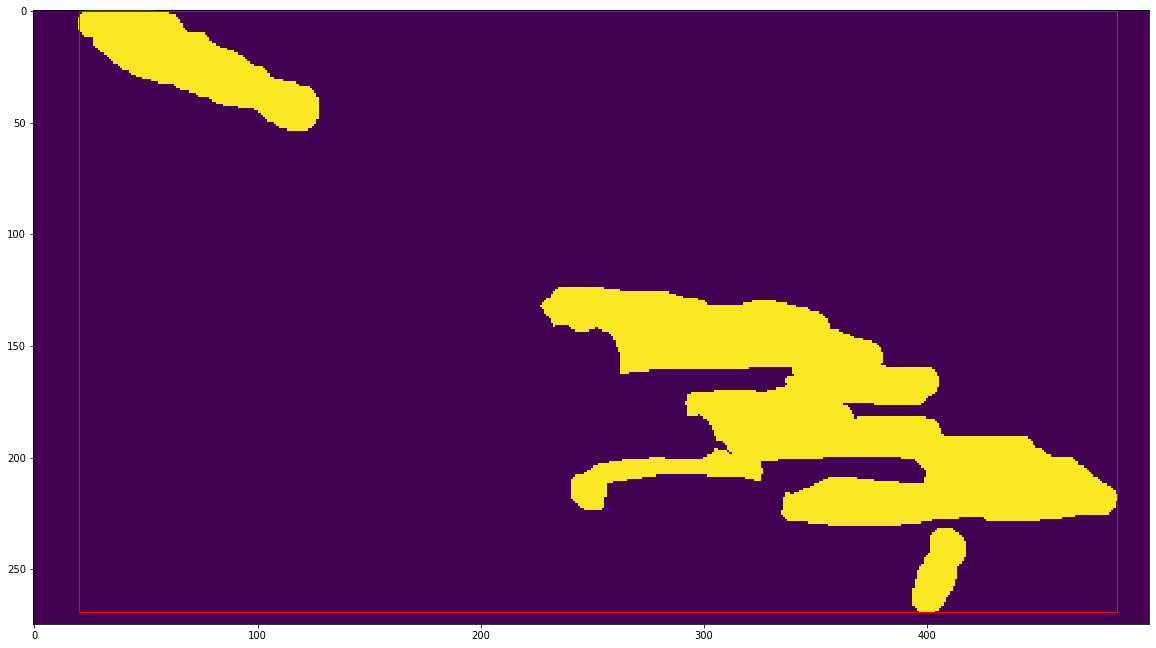

In [45]:
mask = show_data(data, 3, obj_idx=19)

In [36]:
loaded_data = np.load('/home/jenno/data/testdata.npz')

In [37]:
results = {}
for key, value in loaded_data.items():
    results[key] = value

In [38]:
x1 = results["x1"]
y1 = results["y1"]
x2 = results["width"]
y2 = results["height"]
for _x1, _y1, _x2, _y2 in zip(x1, y1, x2, y2):
    print(_x1)

346
52
153
475
357
473
171
410
187


In [39]:
def show_single_data(data):
    #first let's get the image
    fig, ax = plt.subplots(figsize=(20, 15))
    ax.imshow(data["image"])
    num_object = data["num_obj"]
    print("image has {} objects".format(int(results["num_obj"])))
    x1 = results["x1"]
    y1 = results["y1"]
    width = results["width"]
    height = results["height"]
    for _x1, _y1, _width, _height in zip(x1, y1, width, height):
        plt.gca().add_patch(Rectangle((_x1,_y1),width=_width, height=_height, fill=False,color="b"))

image has 9 objects


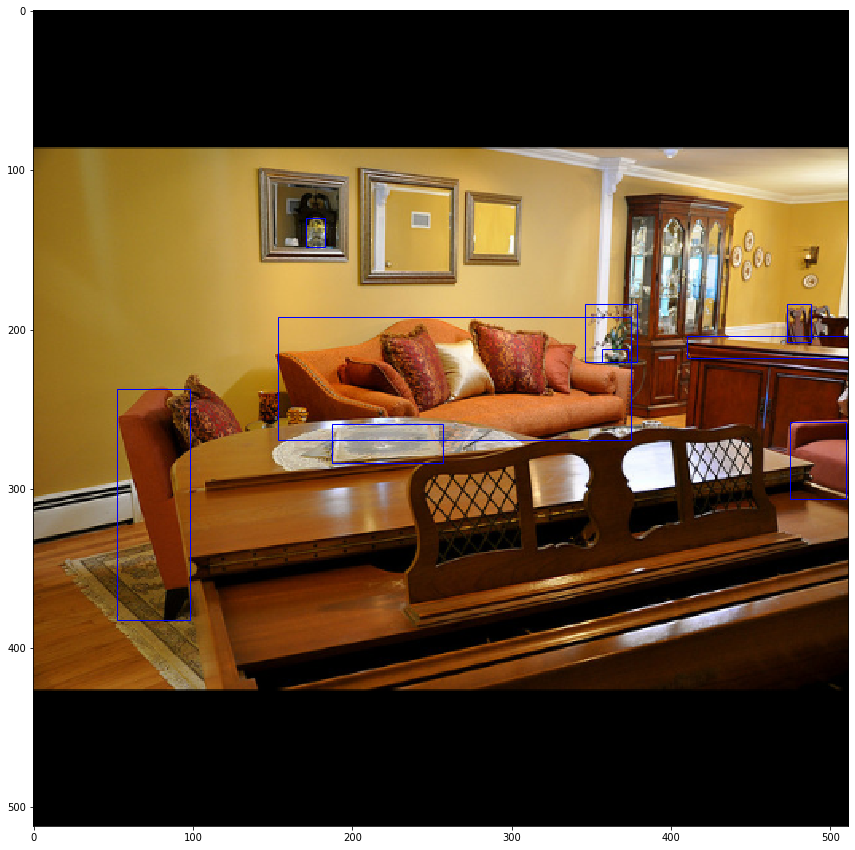

In [40]:
show_single_data(results)